# Data Science Pipeline

1. Data processing
   - in Yuhao's another jupyter notebook
2. Data exploration
    - distribution of categorical/discrete numeric data
    - distribution of continuous numeric data
    - data cleaning
3. Feature engineering
4. Machine learning modles

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Exploration

In [4]:
init_df = pd.read_csv('merged_data.csv')
init_df.head()

,num_baths,num_beds,latitude,longitude,zip_code,property_class,sale_trans_date,sale_amount,universal_size,year_built,...,Twitter,Uber,Wikimedia,Workday,Yahoo,Yelp,YouTube,Zendesk,Zoosk,Facebook
0,0.0,0,37.804640,-122.405206,94111,Condominium (residential),2016-01-04,970000,1299,1993,...,0.000383,0.004867,0.000023,0.014384,0.016568,0.000515,0.012777,0.000176,0.000012,0.040131
1,1.0,1,37.797958,-122.399894,94111,Condominium (residential),2016-01-29,1300000,1189,2007,...,0.000302,0.003901,0.000030,0.013412,0.015701,0.000373,0.012242,0.000139,0.000010,0.037327
2,2.0,0,37.803797,-122.404136,94111,Condominium (residential),2016-03-08,1475000,1423,1983,...,0.000223,0.002633,0.000032,0.014539,0.016705,0.000656,0.011540,0.000150,0.000011,0.040577
3,2.0,0,37.803797,-122.404136,94111,Condominium (residential),2016-03-21,1400000,1518,1983,...,0.000118,0.001119,0.000050,0.014163,0.016370,0.000855,0.009462,0.000143,0.000011,0.039492
4,0.0,0,37.804640,-122.405206,94111,Condominium (residential),2016-03-03,955000,1033,1993,...,0.000894,0.010659,0.000153,0.016205,0.018190,0.002560,0.014889,0.000621,0.000047,0.045383


In [10]:
init_df.dtypes

num_baths          float64
num_beds             int64
latitude           float64
longitude          float64
zip_code             int64
property_class      object
sale_trans_date     object
sale_amount          int64
universal_size       int64
year_built           int64
age_year             int64
price              float64
duplex               int64
apartment            int64
condo                int64
townhouse            int64
num_schools          int64
district            object
num_crimes           int64
Airbnb             float64
Ask                float64
Cisco              float64
Craigslist         float64
Ebates             float64
eBay               float64
Googleplex         float64
Hearsay            float64
LinkedIn           float64
Lyft               float64
Pinterest          float64
Quora              float64
Salesforce         float64
SurveyMonkey       float64
Twitter            float64
Uber               float64
Wikimedia          float64
Workday            float64
Y

### Data Distribution

In [22]:
# discrete numeric columns/categorical columns
cat_cols = ['num_baths', 'num_beds', 'zip_code', 'property_class', 'sale_trans_date',
            'age_year', 'year_built', 'duplex', 'apartment', 'condo', 'townhouse', 'num_schools',
           'num_crimes', 'district']
# continuous numeric columns
numeric_cols = list(set(init_df.columns).difference(set(cat_cols)))
print(numeric_cols)

['Ebates', 'Facebook', 'eBay', 'Salesforce', 'Zendesk', 'latitude', 'Pinterest', 'SurveyMonkey', 'longitude', 'Yelp', 'Ask', 'Googleplex', 'Uber', 'LinkedIn', 'Lyft', 'Wikimedia', 'Workday', 'Airbnb', 'Twitter', 'sale_amount', 'Hearsay', 'universal_size', 'Zoosk', 'Cisco', 'price', 'Yahoo', 'Quora', 'YouTube', 'Craigslist']


### Categorical / discrete numeric columns

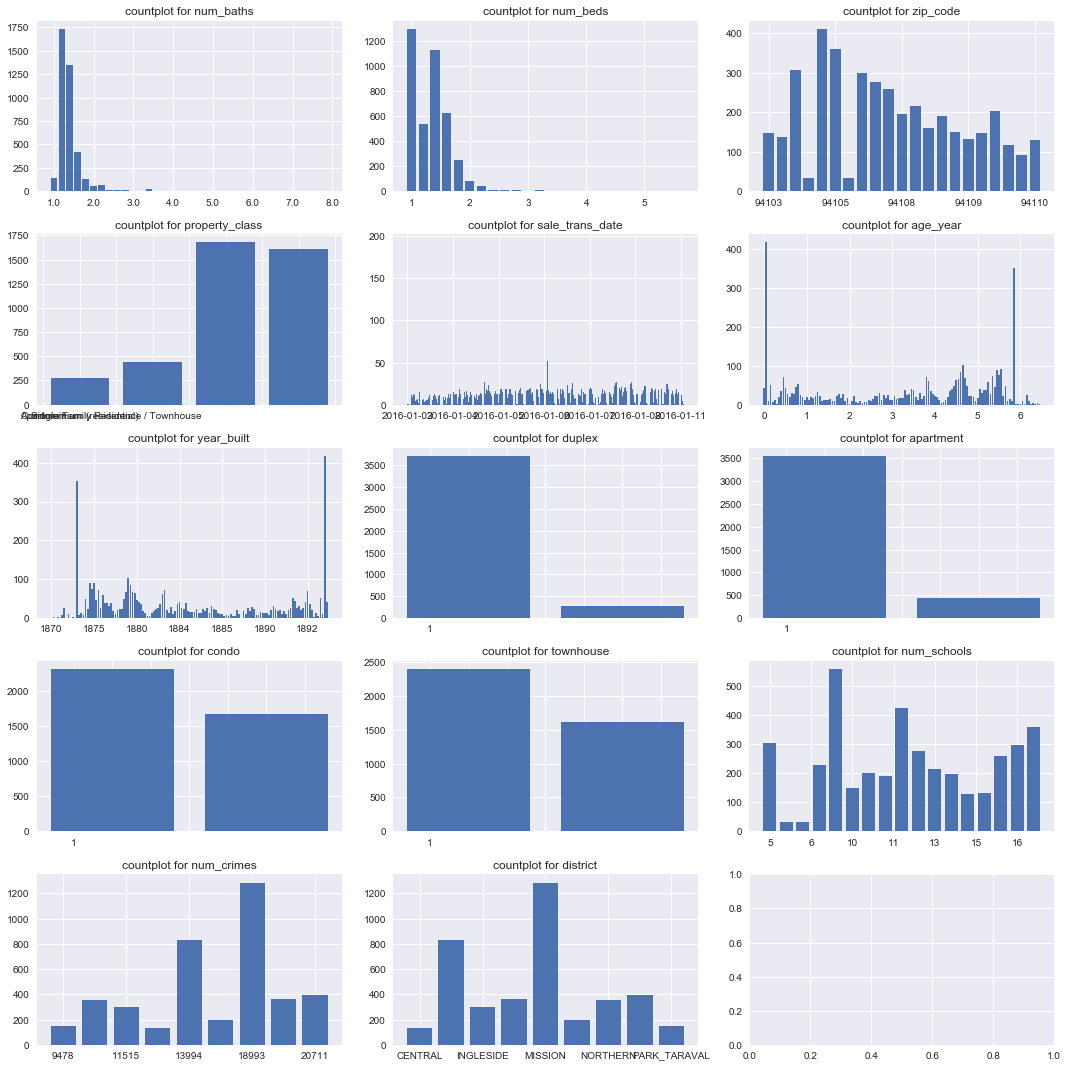

In [44]:
# plot categorical/discrete numeric cols
num_cat = len(cat_cols)
ncols = 3
nrows = math.ceil(num_cat/ncols)
cat_fig, cat_axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15,15))
for row in range(nrows):
    for col in range(ncols):
        ax = cat_axes[row][col]
        idx = ncols * row + col
        if idx < num_cat:
            counts = init_df[cat_cols[idx]].value_counts().sort_index()
            ind = np.arange(len(counts))
            ax.bar(ind, counts.values)
            ax.set_xticklabels(counts.index.values)
            ax.set_title('countplot for {}'.format(cat_cols[idx]))
plt.tight_layout()

#### Findings from the countplots above. Analysis see below

Q1. age_year might have values of 0?  
Q2. age_year and year_built are duplicates?  
Q3. a property can be duplex, apartment, condo... at the same time?  
Q4: correlation between num_baths & num_beds?

**Q1**

In [47]:
# age_year
init_df.age_year.value_counts().sort_index().head()

-1     42
 0    418
 1     10
 2     51
 3      6
Name: age_year, dtype: int64

In [50]:
# why age_year = -1?
init_df[init_df['age_year']==-1].year_built.values

array([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017], dtype=int64)

**=> Answer to Q1: Consider to remove the properties built in 2017**

**Q2**

In [105]:
year_df = init_df[['age_year', 'year_built']]
year_df['calc_age'] = 2016 - year_df['year_built']
year_df['same'] = np.where(year_df['age_year']==year_df['calc_age'], 1, 0)
year_df['same'].value_counts()

1    3997
Name: same, dtype: int64

**=> Answer to Q2:**  
 - **verified: age_year = (2017 - year_built)**    
 - **consider to remove year_built and keep age_year only**

**Q3**

In [106]:
class_df = init_df[['duplex', 'apartment', 'condo', 'townhouse']]
class_df['sum'] = class_df['duplex'] + class_df['apartment'] + class_df['condo'] + class_df['townhouse']
class_df['sum'].value_counts()

1    3997
Name: sum, dtype: int64

**=> Answer to Q3: a property is either duplex or apartment or condo or townhouse**

**Q4**

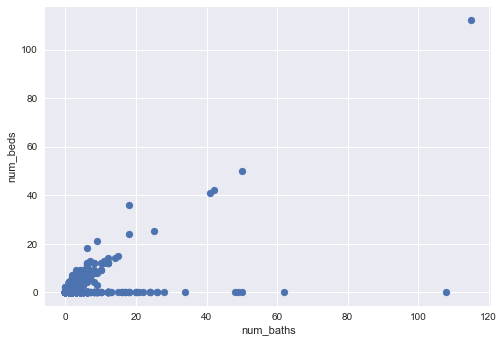

In [94]:
plt.scatter(x=init_df['num_baths'], y=init_df['num_beds'])
plt.xlabel('num_baths')
plt.ylabel('num_beds')

**=> Answer to Q4: no significant correlation between num_baths and num_beds**

### Continuous numeric columns

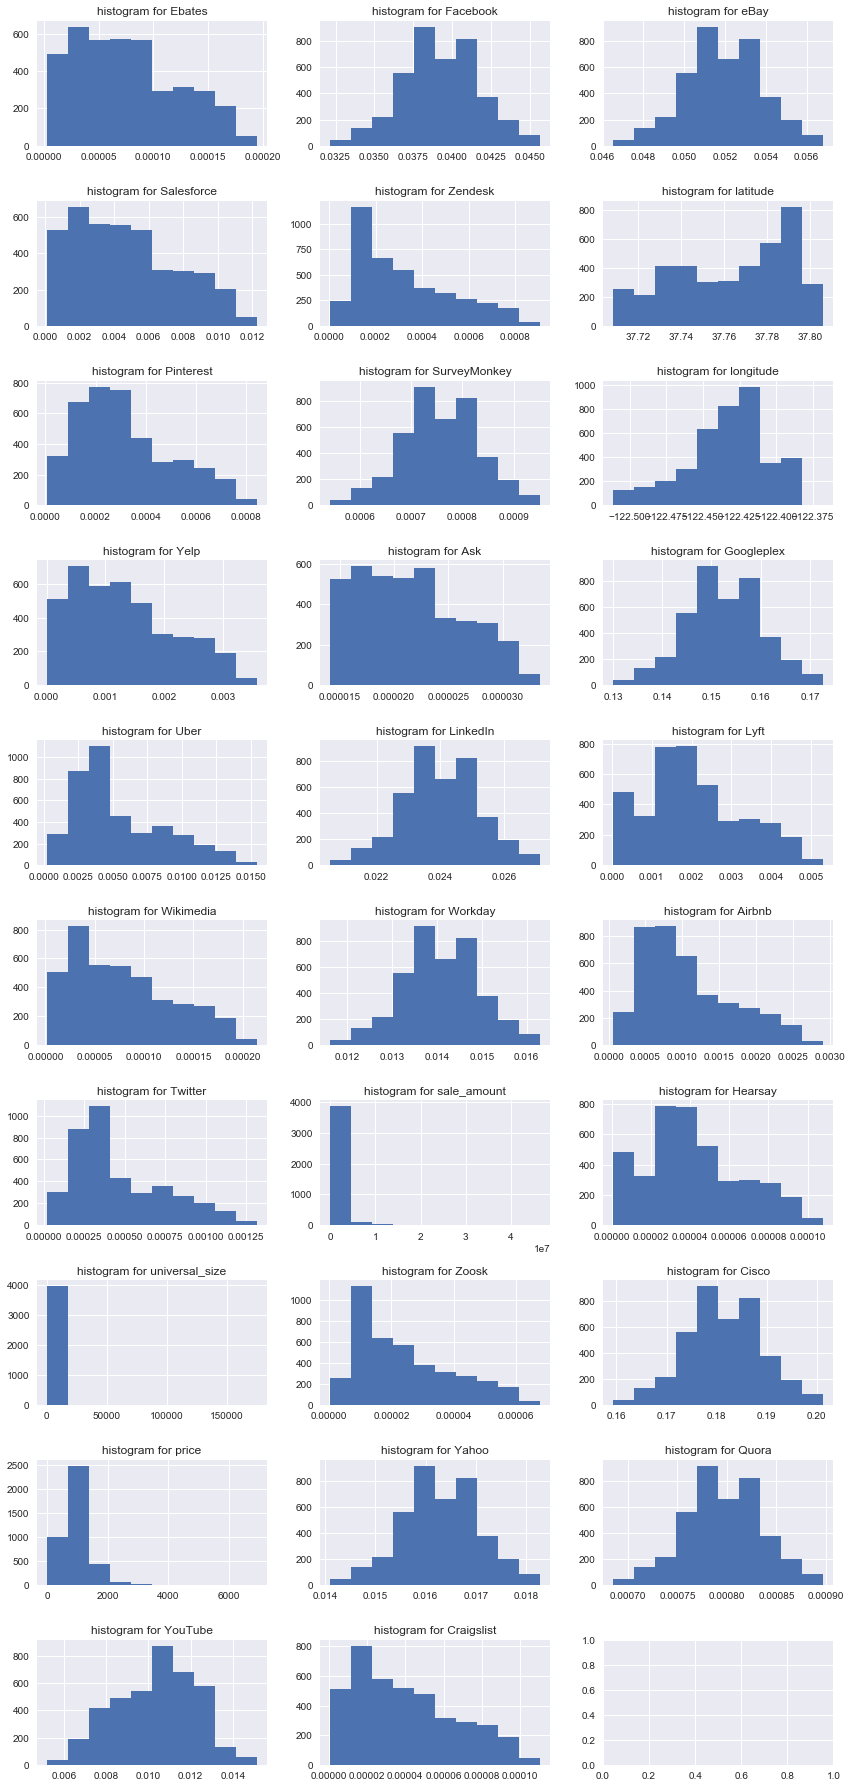

In [26]:
num_numeric = len(numeric_cols)
ncols = 3
nrows = math.ceil(num_numeric/ncols)
numeric_fig, numeric_axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,25))
for row in range(nrows):
    for col in range(ncols):
        ax = numeric_axes[row][col]
        idx = ncols * row + col
        if idx < num_numeric:
            ax.hist(init_df[numeric_cols[idx]])
            ax.set_title('histogram for {}'.format(numeric_cols[idx]))
plt.tight_layout()

#### Findings from the histograms above. Analysis see below

Q1: price * universal_size = sale_amount?  
Q2: correlation between price & sale_amount, and universal_size & sale_amount?  
Q3: correlation between price & sum distance to all companies?

**Q1**

In [107]:
price_df = init_df[['price', 'universal_size', 'sale_amount']]
price_df['calc_amount'] = price_df['price'] * price_df['universal_size']
# if gap > $10, considered different
price_df['gap_is_small'] = np.where(abs(price_df['calc_amount'] - price_df['sale_amount'])>10, 0, 1)
price_df['gap_is_small'].value_counts()

1    3997
Name: gap_is_small, dtype: int64

**=> Answer to Q1: (price * universal_size) roughly equals to sale_amount, so consider to remove sale_amount**

**Q2**

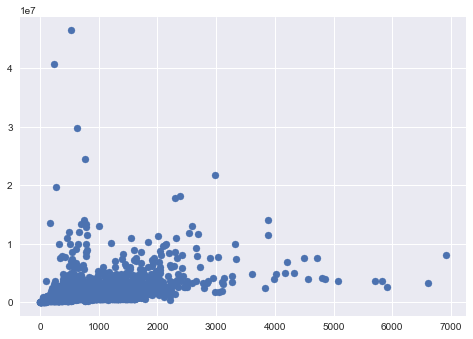

In [61]:
plt.scatter(x=price_df['price'], y=price_df['sale_amount'])

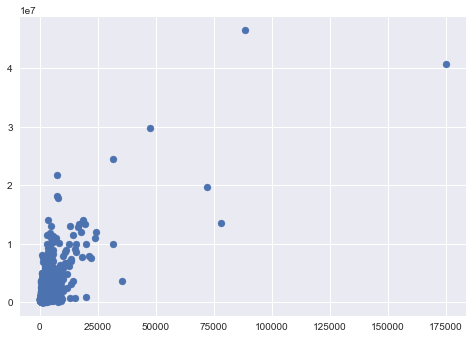

In [62]:
plt.scatter(x=price_df['universal_size'], y=price_df['sale_amount'])

**=> Answer to Q2: no significant correlation between price & sale_amount or universal_size & sale_amount**

**Q3**

In [87]:
company_names = set(numeric_cols).difference(set(['latitude', 'longitude', 'price', 
                                                  'universal_size', 'sale_amount']))
sum_dist = pd.Series(np.zeros(init_df.shape[0]))
for name in company_names:
    sum_dist += init_df[name]

dist_price_df = pd.concat([price_df, sum_dist], axis=1).rename(columns={0:"sum_dist"})
dist_price_df.head()

,price,universal_size,sale_amount,calc_amount,gap_is_small,sum_dist
0,746.728253,1299,970000,970000.0,1,0.511812
1,1093.355761,1189,1300000,1300000.0,1,0.482447
2,1036.542516,1423,1475000,1475000.0,1,0.513268
3,922.266140,1518,1400000,1400000.0,1,0.500254
4,924.491772,1033,955000,955000.0,1,0.583296


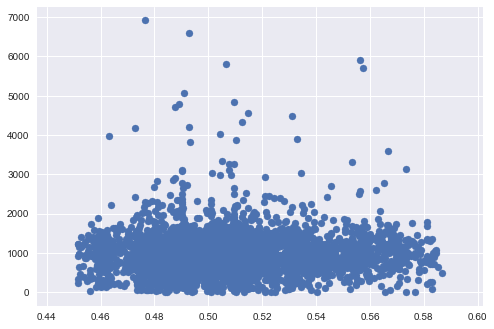

In [90]:
plt.scatter(x=dist_price_df['sum_dist'], y=dist_price_df['price'])

### Summary of EDA, Get Clean Data Based On Exploration

1. remove properties built in 2017
2. use `price` as the label, drop `sale_amount`
3. drop `year_built`, keep `age_year`
4. calculate weighted average distance all companies, and drop distances to any individual company

In [96]:
# remove properties built in 2017
df_2016 = init_df[init_df['year_built']!=2017]
df_2016.shape

(3955, 43)

In [108]:
# calcultate weighted average distance
df_2016['wei_avg_dist'] = sum_dist
df_2016.head()

,num_baths,num_beds,latitude,longitude,zip_code,property_class,sale_trans_date,sale_amount,universal_size,year_built,...,Uber,Wikimedia,Workday,Yahoo,Yelp,YouTube,Zendesk,Zoosk,Facebook,wei_avg_dist
0,0.0,0,37.804640,-122.405206,94111,Condominium (residential),2016-01-04,970000,1299,1993,...,0.004867,0.000023,0.014384,0.016568,0.000515,0.012777,0.000176,0.000012,0.040131,0.511812
1,1.0,1,37.797958,-122.399894,94111,Condominium (residential),2016-01-29,1300000,1189,2007,...,0.003901,0.000030,0.013412,0.015701,0.000373,0.012242,0.000139,0.000010,0.037327,0.482447
2,2.0,0,37.803797,-122.404136,94111,Condominium (residential),2016-03-08,1475000,1423,1983,...,0.002633,0.000032,0.014539,0.016705,0.000656,0.011540,0.000150,0.000011,0.040577,0.513268
3,2.0,0,37.803797,-122.404136,94111,Condominium (residential),2016-03-21,1400000,1518,1983,...,0.001119,0.000050,0.014163,0.016370,0.000855,0.009462,0.000143,0.000011,0.039492,0.500254
4,0.0,0,37.804640,-122.405206,94111,Condominium (residential),2016-03-03,955000,1033,1993,...,0.010659,0.000153,0.016205,0.018190,0.002560,0.014889,0.000621,0.000047,0.045383,0.583296


In [103]:
# drop columns
dropped_cols = list(company_names) + ['sale_amount', 'year_built', 'latitude', 'longitude',
                                     'zip_code', 'district']
clean_df = df_2016.drop(dropped_cols, axis=1)
clean_df.head()

,num_baths,num_beds,property_class,sale_trans_date,universal_size,age_year,price,duplex,apartment,condo,townhouse,num_schools,num_crimes,wei_avg_dist
0,0.0,0,Condominium (residential),2016-01-04,1299,23,746.728253,0,0,1,0,5,21040,0.511812
1,1.0,1,Condominium (residential),2016-01-29,1189,9,1093.355761,0,0,1,0,5,21040,0.482447
2,2.0,0,Condominium (residential),2016-03-08,1423,33,1036.542516,0,0,1,0,5,21040,0.513268
3,2.0,0,Condominium (residential),2016-03-21,1518,33,922.266140,0,0,1,0,5,21040,0.500254
4,0.0,0,Condominium (residential),2016-03-03,1033,23,924.491772,0,0,1,0,5,21040,0.583296


## Feature Engineering

**Use `clean_df` for the feature engineering**

Thoughts:
1. skwed numeric data -> log transformation, normalization
2. date time -> month, day, hour
3. categorical data -> OHE or label encoding
4. change data type